---
# Medium Annulus

This notebook explores the properties/behavior of cortical layers in response to the medium sizes annulus. In some subjects, this stimulus resembles the center stimulus. In others, it resembles the large annulus. Here we explore this relationship

In [1]:
import holeresponse as hr
from linescanning import (
    utils,
    fitting,
    plotting
)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd

opj = os.path.join

## Read data

In [2]:
# import subject dictionary containing useful information
subj_obj = hr.utils.SubjectsDict(proj_dir="/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC")
subj_obj.proj_dir

'/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC'

In [3]:
pkl_files = []

objs = {}
data_dir = opj(os.path.dirname(hr.viz._save_figure(None, return_figdir=True)), "data")
h5_pkl = opj(data_dir, "dn_full_sample_voxel_correction.pkl")
print(f"pkl file: '{h5_pkl}'")
with open(h5_pkl, 'rb') as handle:
    h5_obj = pickle.load(handle)

pkl file: '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/data/dn_full_sample_voxel_correction.pkl'


In [4]:
# inside_subjs = [
#     "002",
#     "005",
#     "011",
#     "014"
# ]

# outside_subjs = [
#     "006",
#     "008",
#     "010",
#     "013"
# ]

# include_subjs = sorted(inside_subjs + outside_subjs)

In [5]:
include_subjs = utils.get_unique_ids(h5_obj.df_comps, id="subject")
include_subjs

['001',
 '002',
 '003',
 '005',
 '006',
 '008',
 '010',
 '011',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '022']

## Make 1D profiles of target parameters

sub-001
sub-002
sub-003
sub-005
sub-006
sub-008
sub-010
sub-011
sub-013
sub-014
sub-015
sub-016
sub-017
sub-018
sub-019
sub-020
sub-022


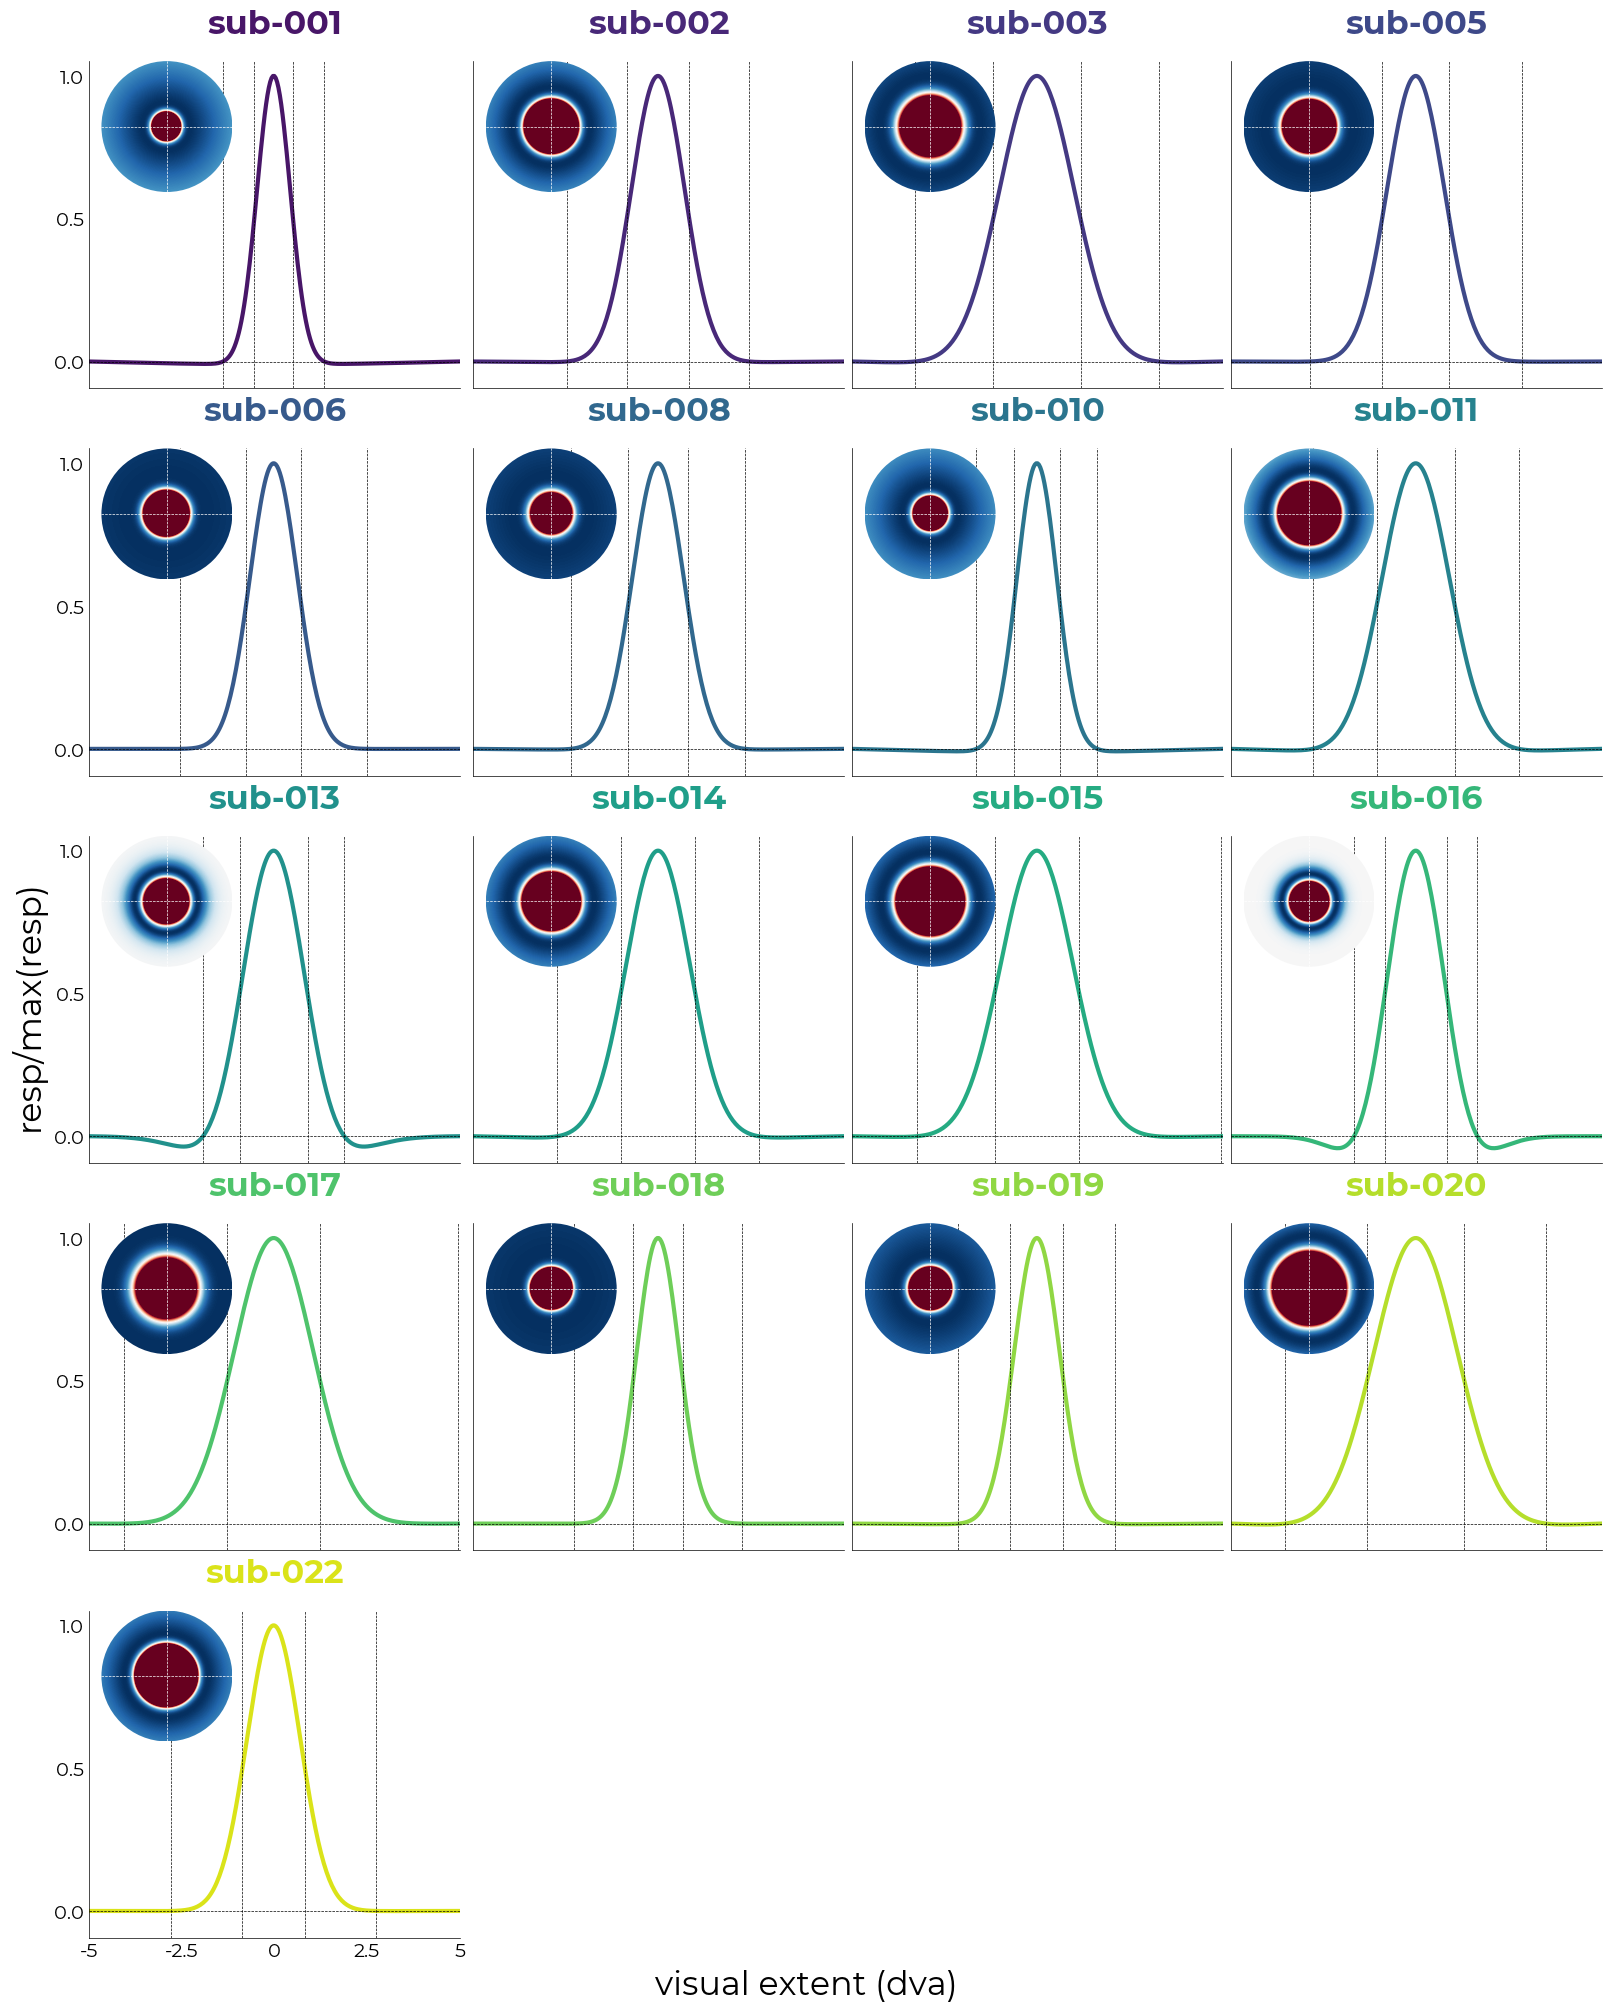

In [35]:
%matplotlib inline
ncols = 4
nrows = int(np.ceil(len(include_subjs)/ncols))
fig,axs = plt.subplots(
    figsize=(ncols*4,nrows*4),
    ncols=ncols,
    nrows=nrows,
    constrained_layout=True,
    sharex=True,
    sharey=True
)

colors = sns.color_palette("viridis", len(include_subjs))
prof_df = []
prf_dict = {}
srf_df = []
resp_df = []
n_pix = 270

for ix,ax in enumerate(axs.flatten()):

    if (ix+1)>len(include_subjs):
        # remove obsolete axes
        ax.remove()
    else:

        sub = include_subjs[ix]
        key = f"sub-{sub}"
        print(key)

        scr = hr.viz.StimPNGs(key)
        srf_df.append(scr.get_srf(key)["max_response"])
        prof1d = scr.get_1d_profile(
            scr.h_pars, 
            n_pix=n_pix
        )
        prf_dict[key] = prof1d.prf_o

        resp = scr.get_response_df(n_pix=n_pix)
        resp_df.append(resp)
        
        # prof_obj =   
        prof = prof1d.prof_1d.squeeze()
        prof /= prof.max()
        prof_df.append(pd.DataFrame(prof, columns=[key]))
        pl = plotting.LazyPlot(
            prof,
            line_width=3,
            color=colors[ix],
            title={
                "title": key, #f"sub-{str(ix+1).zfill(2)}",
                "fontweight": "bold",
                "color": colors[ix]
            },
            axs=axs.flatten()[ix],
            add_hline=0,
            x_ticks=list(np.linspace(0,n_pix,5)),
            x_ticklabels=[-5,-2.5,0,2.5,5],
            add_vline={
                "pos": prof1d.zero_cross_pix+[prof1d.metrics.iloc[0].fwhm_obj.t0_,prof1d.metrics.iloc[0].fwhm_obj.t1_]
            },
            y_ticks=[0,0.5,1]
        )

        ax2 = pl.axs.inset_axes([0.01,0.6,0.4,0.4])
        plotting.LazyPRF(
            prof1d.prf_o, 
            cross_color="white",
            vf_extent=[-5,5], 
            axs=ax2,
            # facecolor="none"
        )

fig.supylabel("resp/max(resp)", fontsize=24)
fig.supxlabel("visual extent (dva)", fontsize=24)

prof_df = pd.concat(prof_df, axis=1)
resp_df = pd.concat(resp_df)
srf_df = pd.DataFrame(np.array(srf_df), columns=["srf_max"])
srf_df["subject"] = include_subjs
srf_df.set_index(["subject"], inplace=True)
# hr.viz._save_figure(
#     fig, 
#     fname="group_desc-1d_profiles", 
#     # overwrite=True
# )

In [36]:
sim_exp = utils.select_from_df(resp_df, expression=f"event_type = center")
sim_exp["srf_max"] = srf_df["srf_max"].values
sim_exp["sub_id"] = np.arange(0,sim_exp.shape[0])
sim_exp


,,response,srf_max,sub_id
subject,event_type,,,
sub-001,center,38.463661,21.254512,0
sub-002,center,16.140777,8.646861,1
sub-003,center,10.549288,5.057010,2
sub-005,center,17.524024,10.970397,3
sub-006,center,25.705770,5.598280,4
sub-008,center,15.091015,10.827374,5
sub-010,center,16.151117,9.964798,6
sub-011,center,9.059960,6.460320,7
sub-013,center,4.962529,4.365506,8


Test=correlation (pearson)	A=srf_max	B=response | r=0.7,	p=0.0


,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,x,y,pearson,two-sided,17,0.698491,"[0.33, 0.88]",0.001815,26.361,0.91125


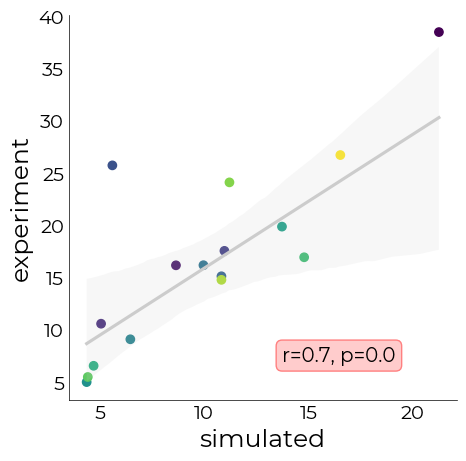

In [44]:
cr = plotting.LazyCorr(
    sim_exp,
    x="srf_max",
    y="response",
    color_by="sub_id",
    figsize=(5,5),
    x_label="simulated",
    y_label="experiment",
    scatter_kwargs={"cbar": False},
    correlation=True,
    result_to_plot=True
)
cr.correlation_result

In [632]:
# import subject dictionary containing useful information
subj_obj = hr.utils.SubjectsDict(proj_dir="/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC")
subj_obj.proj_dir

'/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC'

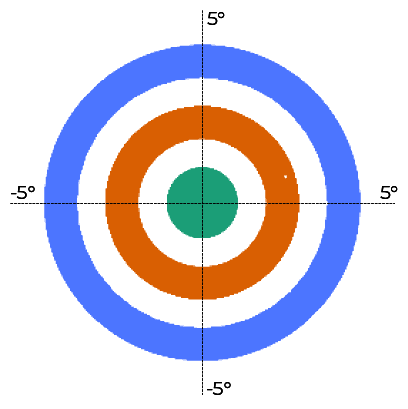

In [34]:
scr = hr.viz.StimPNGs("sub-003")
scr.generate_composite(
    center=True, 
    srf_kws={"screen_size_cm": [39.3,39.3], "screen_size_px": [1080,1080]}, 
    figsize=(5,5), 
    annot=[-5,5,-5,5]
)

In [676]:
scr.get_response_df(center=True)

response
subject event_type               
sub-001 center          38.463661
        medium annulus  -0.601911
        large annulus   -1.639187

In [45]:
comp_ep = fitting.Epoch(
    h5_obj.df_comps.groupby(["subject","task","t"]).mean(),
    hr.data.average_tasks(h5_obj.df_onsets),
    TR=0.105,
    interval=[-2,14]
)

avg_ep = comp_ep.df_epoch.copy()

avg_incl = pd.concat([utils.select_from_df(avg_ep, expression=f"subject = {i.split('-')[-1]}") for i in include_subjs])

sub_df = utils.select_from_df(avg_incl, expression=f"subject = {include_subjs[-1]}")
sub_df

0         1         2  \
subject task run event_type epoch t                                          
022     SRFa 1   act        0     -2.000000   0.059429 -0.176663 -0.176663   
                                  -1.894737   0.215052  0.122923  0.122923   
                                  -1.789474   0.131992  0.090427  0.090427   
                                  -1.684211  -0.092129 -0.121829 -0.121829   
                                  -1.578947  -0.147094 -0.279143 -0.279143   
...                                                ...       ...       ...   
        SRFb 1   suppr_2    4      13.473684  0.087965 -0.251207 -0.251207   
                                   13.578947  0.159078 -0.036674 -0.036674   
                                   13.684211  0.179376 -0.228547 -0.228547   
                                   13.789474  0.305805 -0.056652 -0.056652   
                                   13.894737  0.080504 -0.339492 -0.339492   

                                                     3         4         5  \
subject task run event_type epoch t                                          
022     SRFa 1   act        0     -2.000000   0.059429  0.295520  0.531611   
                                  -1.894737   0.215052  0.307180  0.399308   
                                  -1.789474   0.131992  0.173557  0.215123   
                                  -1.684211  -0.092129 -0.062429 -0.032729   
                                  -1.578947  -0.147094 -0.015045  0.117004   
...                                                ...       ...       ...   
        SRFb 1   suppr_2    4      13.473684  0.087965  0.427137  0.766309   
                                   13.578947  0.159078  0.354830  0.550582   
                                   13.684211  0.179376  0.587299  0.995223   
                                   13.789474  0.305805  0.668262  1.030718   
                                   13.894737  0.080504  0.500500  0.920497   

                                                     6         7         8  \
subject task run event_type epoch t                                          
022     SRFa 1   act        0     -2.000000   0.804508  1.114211  1.423914   
                                  -1.894737   0.660053  1.089415  1.518777   
                                  -1.789474   0.407607  0.751011  1.094415   
                                  -1.684211   0.106175  0.354282  0.602389   
                                  -1.578947   0.254794  0.398325  0.541856   
...                                                ...       ...       ...   
        SRFb 1   suppr_2    4      13.473684  0.680248  0.168956 -0.342336   
                                   13.578947  0.419660 -0.037936 -0.495532   
                                   13.684211  0.929259  0.389410 -0.150440   
                                   13.789474  0.961471  0.460520 -0.040431   
                                   13.894737  0.862693  0.327088 -0.208516   

                                                     9        10        11  \
subject task run event_type epoch t                                          
022     SRFa 1   act        0     -2.000000   1.733618  1.704939  1.337880   
                                  -1.894737   1.948139  1.974266  1.597159   
                                  -1.789474   1.437819  1.480066  1.221157   
                                  -1.684211   0.850496  1.012117  1.087251   
                                  -1.578947   0.685387  0.819531  0.944287   
...                                                ...       ...       ...   
        SRFb 1   suppr_2    4      13.473684 -0.853629 -0.999028 -0.778534   
                                   13.578947 -0.953128 -1.066588 -0.835910   
                                   13.684211 -0.690290 -0.871257 -0.693343   
                                   13.789474 -0.541382 -0.740995 -0.639272   
                                   13.894737 -0.744120 -0.934930 -0.7809